In [ ]:
from google.colab import drive


In [ ]:
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"MyDrive/machine learning /machine-learning-master"

/content/drive/MyDrive/machine learning /machine-learning-master


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report

In [ ]:
dataset=pd.read_csv("predictive_maintenance.csv")

In [ ]:
dataset

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
dataset.shape

(10000, 10)

In [ ]:
#dataf=pd.DataFrame(dataset)
#dataf

 score target : 0.9974124547179576 


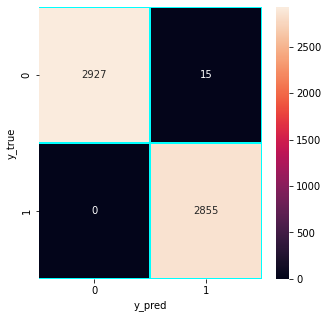

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2927
           1       1.00      0.99      1.00      2870

    accuracy                           1.00      5797
   macro avg       1.00      1.00      1.00      5797
weighted avg       1.00      1.00      1.00      5797



In [ ]:
#dataf = datafTarget

datafTarget=pd.DataFrame(dataset)

y = datafTarget["Target"].values
datafTarget = pd.read_csv("predictive_maintenance.csv", index_col ="UDI" )
datafTarget.drop(["Product ID","Target"], axis = 1, inplace = True)

datafTarget=pd.get_dummies(datafTarget)

x = (datafTarget - np.min(datafTarget))/(np.max(datafTarget)-np.min(datafTarget))
#over sampling
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
x_res,y_res = rus.fit_resample(x,y)
#ax=y_res.value_counts().plot.pie(autopct='%.2f')
#_=ax.set_title("over sampling")
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" score target : {} ".format(knn.score(x_test,y_test)))

y_pred = knn.predict(x_test)
y_true=y_test

#confusion matrix
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_true, y_pred)

#cm vizualization

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="cyan", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#performance parameter 

print(classification_report(y_pred,y_true))

 score heat dissiption : 1.0 


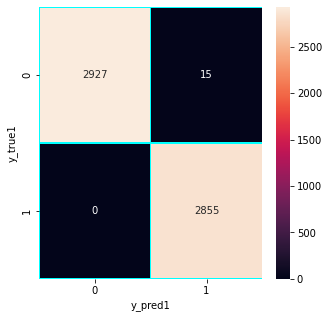

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3005
           1       1.00      1.00      1.00      2928

    accuracy                           1.00      5933
   macro avg       1.00      1.00      1.00      5933
weighted avg       1.00      1.00      1.00      5933



In [41]:
#y = dataf["Target"].values
datafheat=pd.DataFrame(dataset)


datafheat = pd.read_csv("predictive_maintenance.csv", index_col ="UDI" )

datafheat.drop(["Product ID","Target"], axis = 1, inplace = True)
datafheat=pd.get_dummies(datafheat)

y1 = datafheat["Failure Type_Heat Dissipation Failure"].values
x1 = (datafheat - np.min(datafheat))/(np.max(datafheat)-np.min(datafheat))
#over sampling
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
x_resh,y_resh = rus.fit_resample(x1,y1)
#ax=y_res.value_counts().plot.pie(autopct='%.2f')
#_=ax.set_title("over sampling")
# train test split
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_resh,y_resh,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors = 2) # n_neighbors = k
knn1.fit(x_train1,y_train1)
prediction1 = knn1.predict(x_test1)
print(" score heat dissiption : {} ".format(knn1.score(x_test1,y_test1)))

y_pred1 = knn1.predict(x_test1)
y_true1=y_test1

#confusion matrix
from sklearn.metrics import confusion_matrix

cm1= confusion_matrix(y_true1, y_pred1)

#cm vizualization

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="cyan", fmt=".0f", ax=ax)
plt.xlabel("y_pred1")
plt.ylabel("y_true1")
plt.show()

#performance parameter 

print(classification_report(y_pred1,y_true1))


 score of overstrain : 0.9838763856231105 


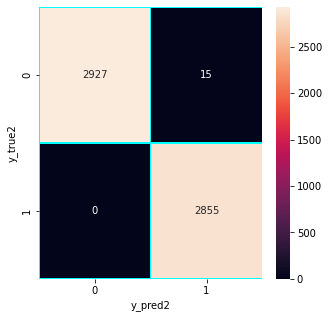

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2915
           1       1.00      0.97      0.98      3039

    accuracy                           0.98      5954
   macro avg       0.98      0.98      0.98      5954
weighted avg       0.98      0.98      0.98      5954



In [ ]:
#y = dataf["Target"].values
datafover=pd.DataFrame(dataset)

datafover = pd.read_csv("predictive_maintenance.csv", index_col ="UDI")
datafover.drop(["Product ID","Target"], axis = 1, inplace = True)

datafover=pd.get_dummies(datafover)
y2 = datafover["Failure Type_Overstrain Failure"].values
x2 = (datafover - np.min(datafover))/(np.max(datafover)-np.min(datafover))
#oversampling
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
x_resO,y_resO = rus.fit_resample(x2,y2)
#ax=y_res.value_counts().plot.pie(autopct='%.2f')
#_=ax.set_title("over sampling")
# train test split
# train test split
from sklearn.model_selection import train_test_split
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resO,y_resO,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn2.fit(x_train2,y_train2)
prediction2 = knn2.predict(x_test2)
print(" score of overstrain : {} ".format(knn.score(x_test2,y_test2)))

y_pred2 = knn.predict(x_test2)
y_true2 = y_test2

#confusion matrix
from sklearn.metrics import confusion_matrix

cm2= confusion_matrix(y_true2, y_pred2)

#cm vizualization

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="cyan", fmt=".0f", ax=ax)
plt.xlabel("y_pred2")
plt.ylabel("y_true2")
plt.show()

#performance parameter 

print(classification_report(y_pred2,y_true2))

 score of power failure : 1.0 


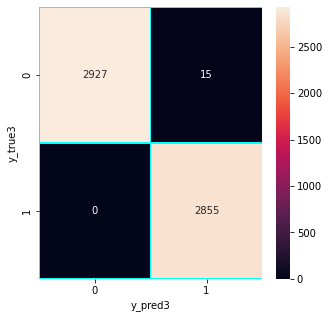

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3008
           1       1.00      1.00      1.00      2935

    accuracy                           1.00      5943
   macro avg       1.00      1.00      1.00      5943
weighted avg       1.00      1.00      1.00      5943



In [ ]:
#y = dataf["Target"].values
datafpower=pd.DataFrame(dataset)

datafpower = pd.read_csv("predictive_maintenance.csv", index_col ="UDI" )
datafpower.drop(["Product ID","Target"], axis = 1, inplace = True)

datafpower=pd.get_dummies(datafpower)
y3 = datafpower["Failure Type_Power Failure"].values
x3 = (datafpower - np.min(datafpower))/(np.max(datafpower)-np.min(datafpower))
#oversampling
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
x_resp,y_resp = rus.fit_resample(x3,y3)
#ax=y_res.value_counts().plot.pie(autopct='%.2f')
#_=ax.set_title("over sampling")
# train test split
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_resp,y_resp,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train3,y_train3)
prediction3 = knn.predict(x_test3)
print(" score of power failure : {} ".format(knn.score(x_test3,y_test3)))

y_pred3 = knn.predict(x_test3)
y_true3 = y_test3

#confusion matrix
from sklearn.metrics import confusion_matrix

cm3= confusion_matrix(y_true3, y_pred3)

#cm vizualization

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="cyan", fmt=".0f", ax=ax)
plt.xlabel("y_pred3")
plt.ylabel("y_true3")
plt.show()

#performance parameter 

print(classification_report(y_pred3,y_true3))

 score of random failure : 1.0 


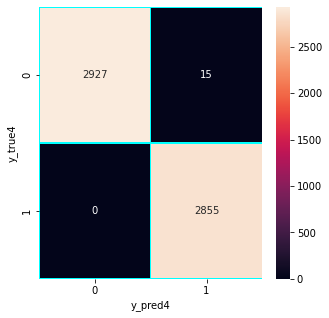

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3043
           1       1.00      1.00      1.00      2947

    accuracy                           1.00      5990
   macro avg       1.00      1.00      1.00      5990
weighted avg       1.00      1.00      1.00      5990



In [ ]:
#y = dataf["Target"].values
datafran=pd.DataFrame(dataset)


datafran = pd.read_csv("predictive_maintenance.csv", index_col ="UDI" )
datafran.drop(["Product ID","Target"], axis = 1, inplace = True)

datafran=pd.get_dummies(datafran)

y4 = datafran["Failure Type_Random Failures"].values
x4 = (datafran - np.min(datafran))/(np.max(datafran)-np.min(datafran))
#oversampling
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
x_resr,y_resr = rus.fit_resample(x4,y4)
#ax=y_res.value_counts().plot.pie(autopct='%.2f')
#_=ax.set_title("over sampling")
# train test split
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_resr,y_resr,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn4 = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn4.fit(x_train4,y_train4)
prediction4 = knn4.predict(x_test4)
print(" score of random failure : {} ".format(knn4.score(x_test4,y_test4)))

y_pred4 = knn4.predict(x_test4)
y_true4 = y_test4

#confusion matrix
from sklearn.metrics import confusion_matrix

cm3= confusion_matrix(y_true4, y_pred4)

#cm vizualization

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="cyan", fmt=".0f", ax=ax)
plt.xlabel("y_pred4")
plt.ylabel("y_true4")
plt.show()

#performance parameter 

print(classification_report(y_pred4,y_true4))

 score of tool wear failure : 0.9936666666666667 


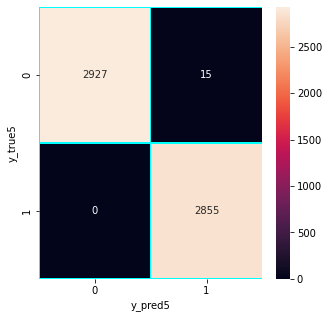

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2989
           1       1.00      1.00      1.00        11

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [42]:
#y = dataf["Target"].values
dataftool=pd.DataFrame(dataset)

dataftool = pd.read_csv("predictive_maintenance.csv", index_col ="UDI" )
dataftool.drop(["Product ID","Target"], axis = 1, inplace = True)

dataftool=pd.get_dummies(dataftool)
y5 = dataftool["Failure Type_Tool Wear Failure"].values
x5 = (dataftool- np.min(dataftool))/(np.max(dataftool)-np.min(dataftool))
#over sampling
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
x_rest,y_rest = rus.fit_resample(x5,y5)
#ax=y_res.value_counts().plot.pie(autopct='%.2f')
#_=ax.set_title("over sampling")
# train test split
from sklearn.model_selection import train_test_split
x_train4, x_test4, y_train4, y_test4 = train_test_split(x_rest,y_rest,test_size = 0.3,random_state=1)
# train test split
from sklearn.model_selection import train_test_split
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5,y5,test_size = 0.3,random_state=1)

from sklearn.neighbors import KNeighborsClassifier
knn5 = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn5.fit(x_train5,y_train5)
prediction4 = knn5.predict(x_test5)
print(" score of tool wear failure : {} ".format(knn4.score(x_test5,y_test5)))

y_pred5 = knn5.predict(x_test5)
y_true5 = y_test5

#confusion matrix
from sklearn.metrics import confusion_matrix

cm5= confusion_matrix(y_true5, y_pred5)

#cm vizualization

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="cyan", fmt=".0f", ax=ax)
plt.xlabel("y_pred5")
plt.ylabel("y_true5")
plt.show()

#performance parameter 

print(classification_report(y_pred5,y_true5))